In [ ]:
!pip install tensorflow
!pip install keras
!pip install h5py

In [ ]:
!pip install keras_vggface

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Q1 - Extract and load 'PINS'

In [ ]:
# Import the data PINS.zip
!unzip '/content/drive/My Drive/PINS.zip'

Streaming output truncated to the last 5000 lines.
  inflating: PINS/pins_kiernan shipka/kiernan shipka 1.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 10.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 100.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 101.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 102.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 103.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 104.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 105.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 106.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 107.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 108.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 109.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 11.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 110.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 111.jpg  
  inflat

In [ ]:
import zipfile
import os
from os import listdir
path = ('/content/drive/My Drive/PINS.zip')
def load_images_labels(path):
  images = []
  labels = []
  for i in os.listdir(path):
    for f in os.listdir(os.path.join(path, i)):
      ext = os.path.splitext(f)[1]
      if ext == '.jpg':
        images.append(os.path.join(path, i, f))
        labels.append(i)
  return images, labels

In [ ]:
# Call the function to load images and labels
images, labels = load_images_labels('/content/PINS') # Changed path to extracted folder

In [ ]:
# Print details of images
print("Images:")
for image_path in images:
    print(image_path)

#print("\nLabels:")
#for label in labels:
 #   print(label)

Streaming output truncated to the last 5000 lines.
/content/PINS/pins_Krysten Ritter/Krysten Ritter36_15.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter185_78.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter85_95.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter12_30.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter63_89.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter21_101.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter30_93.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter112_36.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter23_4.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter9_61.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter108_57.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter10_64.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter57_43.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter137_108.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter96_92.jpg
/content/PINS/pins_Krysten Ritter/Krysten Ritter52_27.jpg
/content/PINS/pin

### Q2 - Function to create metadata of the image

In [ ]:
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

### Q3 - Function to load metadata

In [ ]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [ ]:
# Call load_metadata to read the images and assign metadata to a variable

metadata = load_metadata('/content/PINS')

In [ ]:
# Write a function to read image using opencv and convert it from BGR to RGB
import cv2

def load_image(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
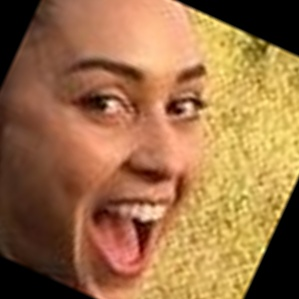

In [ ]:
load_image(metadata[0].image_path())

In [ ]:
image_array = load_image(metadata[0].image_path())
print(type(image_array))  # Output: <class 'numpy.ndarray'>
print(image_array.shape)  # Output: (height, width, 3)

<class 'numpy.ndarray'>
(299, 299, 3)


### Q4 - Generate embedding vectors

Creating a VGG (Visual Geometric Group) Face model for Face Recognition.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

# Initializing a Sequential Model
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

vgg_face_weights.h5 file contains pre-trained weights for a VGG model designed for face recognition. In your face recognition task, we can utilize these weights to perform transfer learning.
Instead of training a model from scratch, we can use the VGG model with these pre-trained weights as a base, which will help improve your model's performance and speed up the training process.

In [ ]:
!pip install h5py
model = vgg_face()
model.load_weights('/content/drive/My Drive/vgg_face_weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import keras
print(keras.__version__)

3.8.0


Creating new keras model vgg_face_descriptor by using transfer learning.

leveraging the knowledge learned by the pre-trained vgg_face model (trained on a large dataset of faces) and applying it to  specific task.

This is taking an existing pre-trained model (vgg_face model) created earlier and modifies it to extract features (embeddings) rather than performing full classification.



inputs=model.layers[0].input defines the input of the new model.

It's set to the input of the first layer (layers[0]) of the original model. This means the vgg_face_descriptor will take the same kind of input as the original model.

outputs=model.layers[-2].output defines the output of the new model.

It's set to the output of the second-to-last layer (layers[-2]) of the original model.

 Instead of taking the final classification output, we're interested in the features (embeddings) learned by the network just before the classification layer.

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using 1  gg_face_descriptor model and print the shape

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
(2622,)


- Write code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [29]:
# Path to store embeddings
embedding_cache_path = '/content/drive/My Drive/image_embeddings.npy'

# Check if embeddings are already cached
if os.path.exists(embedding_cache_path):
    print("Loading embeddings from cache...")
    embeddings = np.load(embedding_cache_path)
else:
    print("Generating embeddings...")
    embeddings = np.zeros((metadata.shape[0], 2622))  # Initialize with zeros

batch_size = 32  # Adjust the batch size as needed

for i in range(0, len(metadata), batch_size):
        batch_metadata = metadata[i : i + batch_size]
        batch_images = []

        for m in batch_metadata:
            try:
                img_path = m.image_path()
                img = load_image(img_path)

                # Preprocess the image
                img = (img / 255.).astype(np.float32)
                img = cv2.resize(img, dsize=(224, 224))

                batch_images.append(img)

            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
                # If error, append zeros for this image in the batch
                batch_images.append(np.zeros((224, 224, 3), dtype=np.float32))

        # Generate embeddings for the batch
        batch_embeddings = vgg_face_descriptor.predict(np.array(batch_images))

        # Store the embeddings in the main array
        embeddings[i : i + batch_size] = batch_embeddings

# Save the embeddings to cache
np.save(embedding_cache_path, embeddings)
print("Embeddings saved to cache.")

Loading embeddings from cache...
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213m

USED BATCHES IN EMBEDDING TO SAVE COMPUTATIONAL TIME AND STORED IT TO CACHE.

### Q5

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In this code, the function distance calculates the squared L2 distance between two embedding vectors to measure the similarity between the corresponding images. A smaller distance indicates higher similarity, while a larger distance suggests the images are more dissimilar.

In [30]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

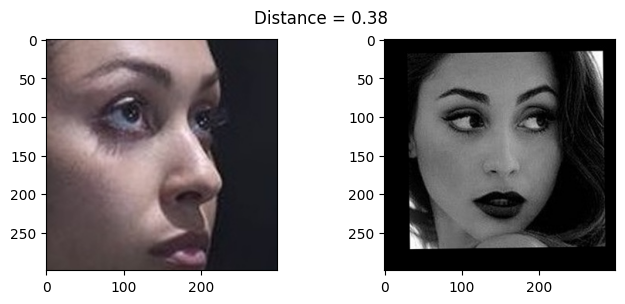

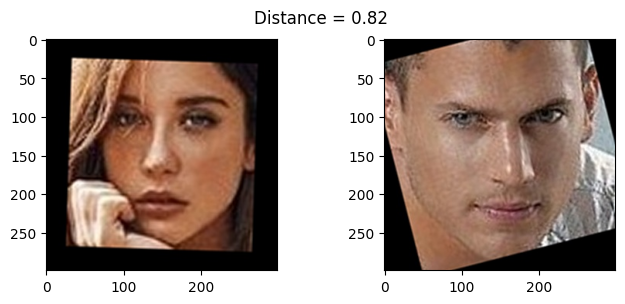

In [59]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

show_pair(2, 8)
show_pair(140, 150)

A smaller distance indicates higher similarity, while a larger distance suggests the images are more dissimilar.

In the former pair the Distance is 0.38 which shows that the images have some similarity but in the latter one the Distance is 0.82 which indicates dissimilarity.

### Q6

- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [32]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

- Encode the targets
- Use LabelEncoder

Since the target variables (the names of the people in the images) are categorical (strings), we need to convert them into numerical representations using encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the training labels (y_train)
encoder.fit(y_train)

# Transform both training and testing labels using fitted encoder
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [62]:
for i in range(10):  # Print for the first 10 examples
       print("Original Label:", y_train[i], "Encoded Label:", y_train_encoded[i])

Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85
Original Label: pins_lindsey morgan face Encoded Label: 85


- Scale the features using StandardScaler

In [35]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data(X_train)
scaler.fit(X_train)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

PCA transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

In [36]:
# Reduce feature dimensions using PCA
from sklearn.decomposition import PCA

# create PCA object
pca = PCA(n_components =128)

# Fit PCA to the scaled data
pca.fit(X_train_scaled)

# Transform both training and testing data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Q7

 - Train the SVM classifier and print the score

The SVM classifier is used to predict the identities of people in images based on their facial features. The code extracts features (embeddings) from images using a deep learning model, preprocesses the data, and then trains an SVM classifier on these features to learn the patterns associated with different individuals.

In [37]:
from sklearn.svm import SVC

# Create an SVM classifier object
svm_classifier = SVC(kernel = 'linear')

# Train the classifer on the training data
# This step trains the SVM model to learn the patterns in the data and make predictions.
svm_classifier.fit(X_train_pca, y_train_encoded)


# Predict labels for the testing data
y_pred = svm_classifier.predict(X_test_pca)

# Evaluae the performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.9523809523809523


We could see that the model is working good with .95 accuracy.

### Q8 - Import and display test images

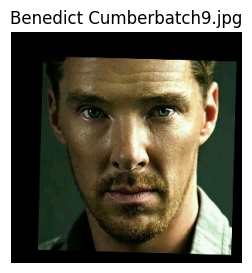

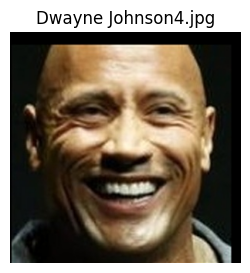

In [38]:
import os
import matplotlib.pyplot as plt
import cv2


path = '/content/drive/My Drive/testimages'

# Get a list of image file names in the folder
test_image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display each test image
for image_file in test_image_files:
    # Construct the full path to the image
    image_path = os.path.join(path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(image_file)  # Set the title to the image file name
    plt.axis('off')  # Hide the axes
    plt.show()


### Q9 - Use the trained SVM model to predict the face on both test images

In [42]:
path = '/content/drive/My Drive/testimages'
test_image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

test_images = []
for image_file in test_image_files:
    image_path = os.path.join(path, image_file)
    img = load_image(image_path)  # Assuming you have the load_image function from before
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize=(224, 224))
    test_images.append(img)

test_images = np.array(test_images)

In [44]:
test_embeddings = vgg_face_descriptor.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [45]:
test_embeddings_scaled = scaler.transform(test_embeddings)  # Using the scaler from before
test_embeddings_pca = pca.transform(test_embeddings_scaled) # Using the pca from before

In [46]:
predictions = svm_classifier.predict(test_embeddings_pca)

Image: Benedict Cumberbatch9.jpg, Predicted Person: pins_Benedict Cumberbatch


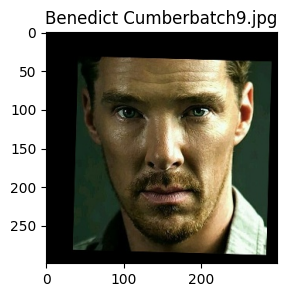

Image: Dwayne Johnson4.jpg, Predicted Person: pins_Dwayne Johnson


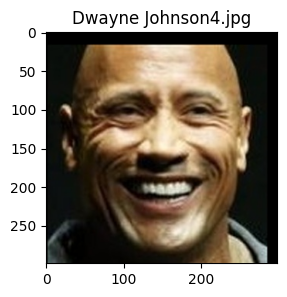

In [68]:
predicted_names = encoder.inverse_transform(predictions)  # Convert back to original labels

for i, image_file in enumerate(test_image_files):
    print(f"Image: {image_file}, Predicted Person: {predicted_names[i]}")

    # Construct the full path to the image
    image_path = os.path.join(path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(image_file)  # Set the title to the image file name
    #plt.axis('off')  # Hide the axes

    plt.show()

Model:

* The code loads images of faces from a dataset called "PINS".
* It extracts metadata about each image, including the person's identity.
* Images are preprocessed by resizing and converting to RGB format.

Feature Extraction:

* A pre-trained VGG-Face model is used to extract facial features (embeddings) from each image.

* These embeddings represent the unique characteristics of each face.

Target Encoding:

* A pre-trained VGG-Face model is used to extract facial features (embeddings) from each image.

* These embeddings represent the unique characteristics of each face.

Feature Scaling and Dimensionality Reduction:

* Features are scaled using StandardScaler to have zero mean and unit variance.

* Principal Component Analysis (PCA) is used to reduce the dimensionality of the features while preserving important information.

Model Training (SVM):

* A Support Vector Machine (SVM) classifier is trained on the preprocessed and reduced features.

* The SVM learns to distinguish between different faces based on their embeddings.

Prediction:

* The trained SVM model is used to predict the identity of faces in test images.

* The predicted labels are converted back to original names.

### Insights:

We could see that the model has predicted exactly the test images with 0.95 accuracy.

The accuracy of model can be improved more by applying L1 or L2 regularization to SVM classifier to prevent over fitting.



Applying data augmentation techniques (like random rotations, flips, and crops) to the training images can help improve the model's generalization ability and robustness to variations in face poses and lighting conditions.